In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def load_img():
     blank_img=np.zeros((600,600))
     font = cv2.FONT_HERSHEY_SIMPLEX
     cv2.putText(blank_img,text='ABCDE',org=(50,300),fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
     return blank_img

In [5]:
def display_img(img):
     fig = plt.figure(figsize=(12,10))
     ax = fig.add_subplot(111)
     ax.imshow(img,cmap='gray')

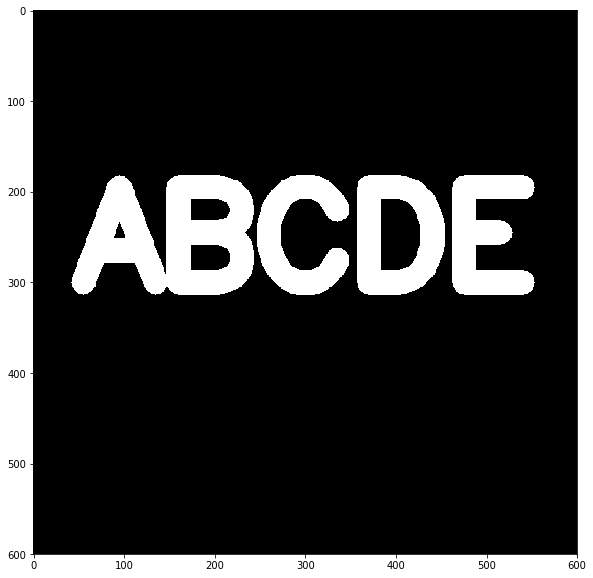

In [20]:
img = load_img()
display_img(img)

In [13]:
kernel = np.ones((5,5),dtype= np.uint8)

In [14]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [18]:
result = cv2.erode(img,kernel,iterations=4)

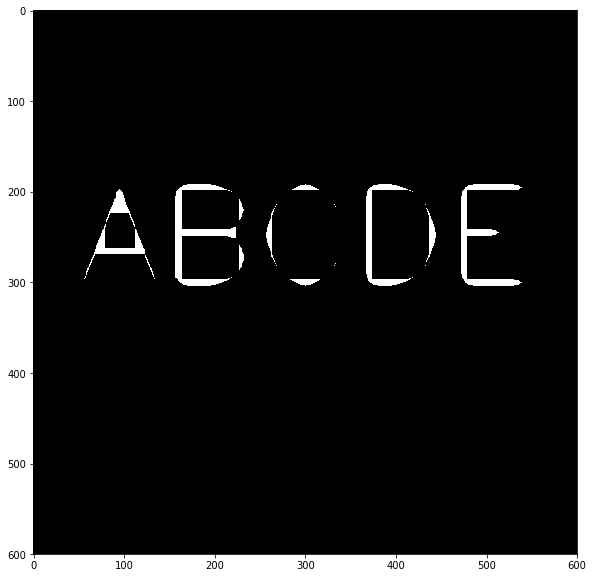

In [21]:
display_img(result)

In [22]:
img = load_img()

In [23]:
white_noise = np.random.randint(0,2,size=(600,600))

In [24]:
white_noise

array([[0, 1, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0]])

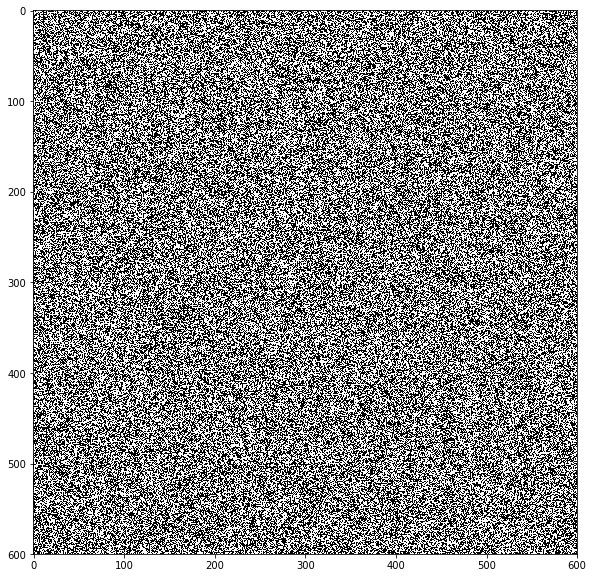

In [25]:
display_img(white_noise)

In [26]:
img.max()

255.0

In [27]:
white_noise = white_noise*255

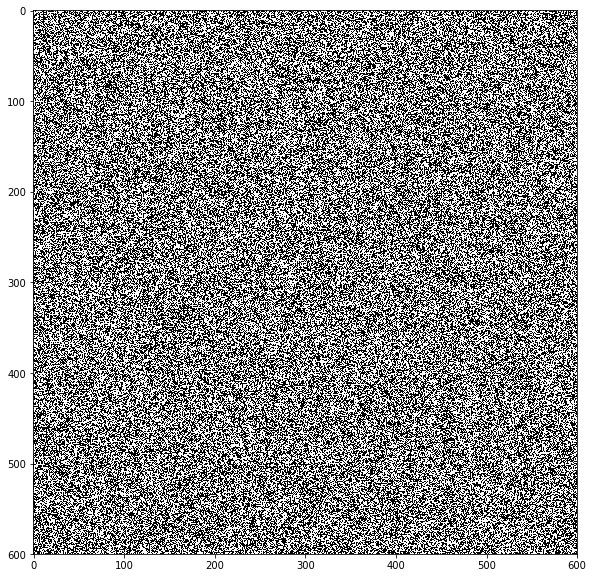

In [28]:
display_img(white_noise)

In [29]:
noise_img = white_noise + img

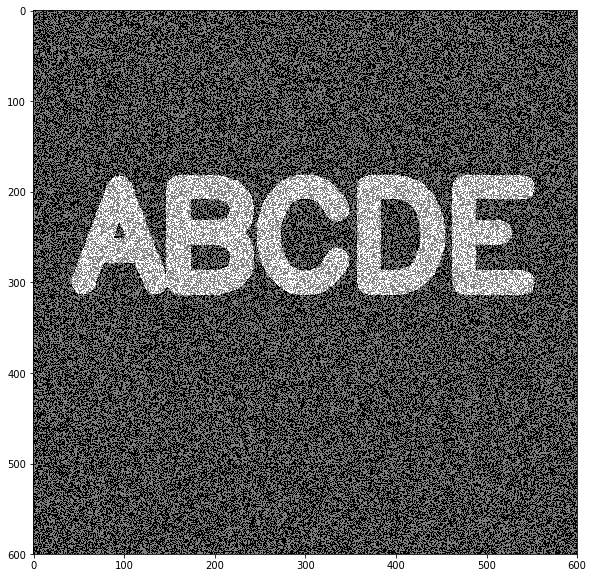

In [30]:
display_img(noise_img)

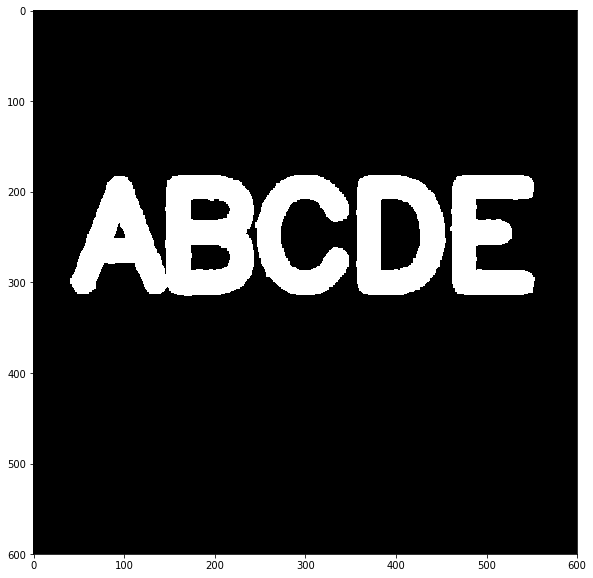

In [31]:
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)
display_img(opening)

In [32]:
img = load_img()

In [35]:
black_noise = np.random.randint(0,2,size=(600,600))

In [37]:
black_noise = black_noise * -255

In [40]:
black_noise

array([[-255, -255, -255, ...,    0, -255, -255],
       [-255, -255,    0, ..., -255,    0,    0],
       [   0,    0,    0, ..., -255, -255, -255],
       ...,
       [-255,    0,    0, ..., -255,    0, -255],
       [-255,    0,    0, ...,    0,    0, -255],
       [   0,    0,    0, ..., -255, -255,    0]])

In [41]:
black_noise_img = img + black_noise

In [44]:
black_noise_img 

array([[-255., -255., -255., ...,    0., -255., -255.],
       [-255., -255.,    0., ..., -255.,    0.,    0.],
       [   0.,    0.,    0., ..., -255., -255., -255.],
       ...,
       [-255.,    0.,    0., ..., -255.,    0., -255.],
       [-255.,    0.,    0., ...,    0.,    0., -255.],
       [   0.,    0.,    0., ..., -255., -255.,    0.]])

In [45]:
black_noise_img[black_noise_img == -255] = 0

In [46]:
black_noise_img.min()

0.0

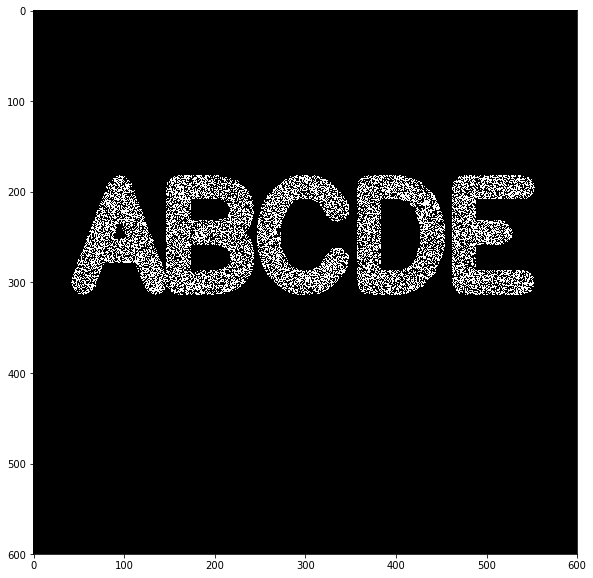

In [47]:
display_img(black_noise_img)

In [48]:
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)

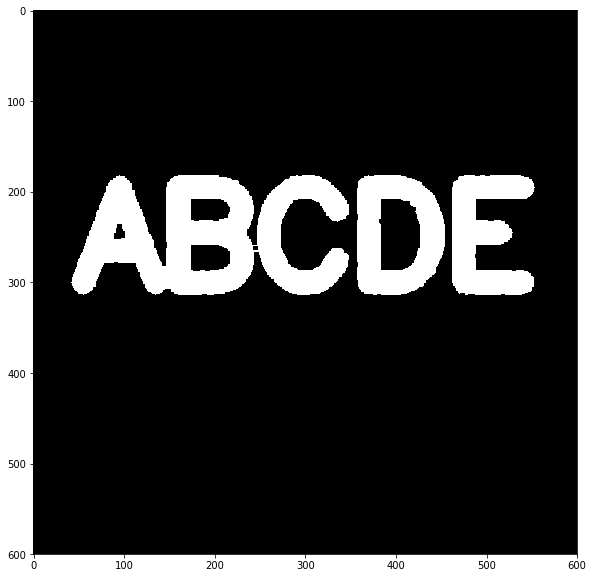

In [49]:
display_img(closing)

In [50]:
img = load_img()

In [53]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

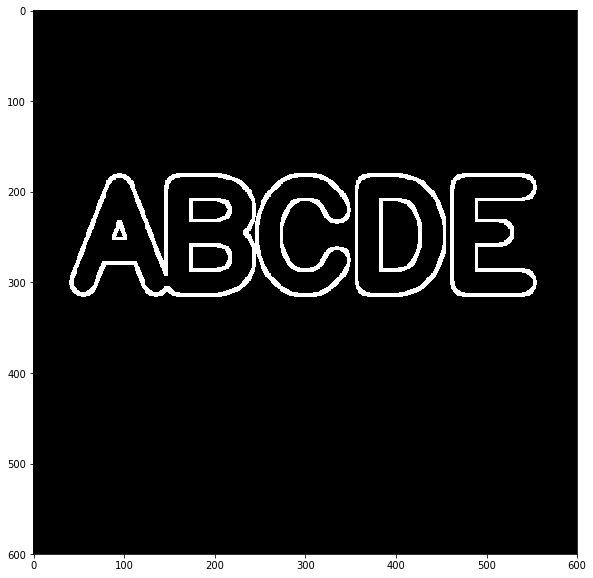

In [54]:
display_img(gradient)

In [55]:
img = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/sudoku.jpg',0)

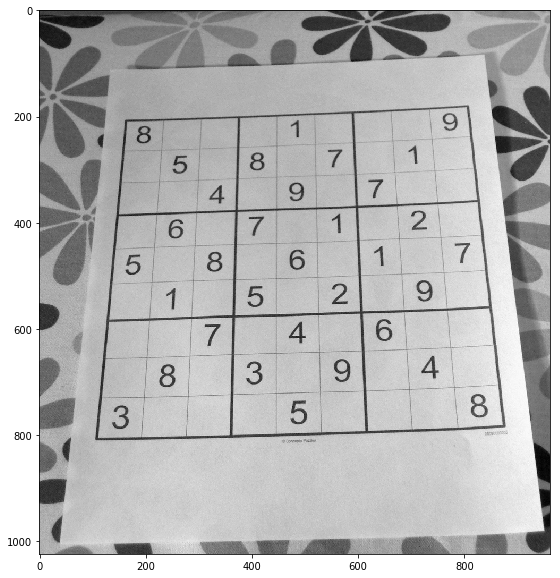

In [56]:
display_img(img)

In [57]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)

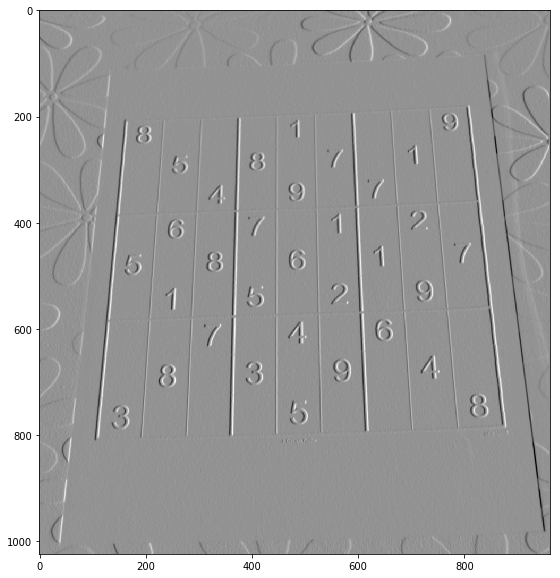

In [58]:
display_img(sobelx)

In [59]:
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

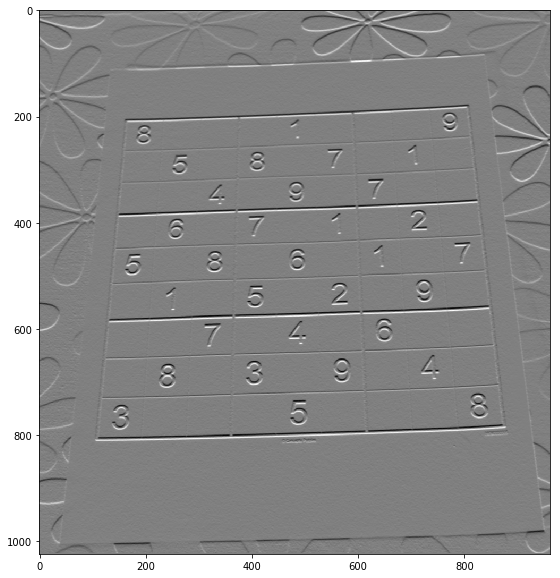

In [60]:
display_img(sobely)

In [65]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)

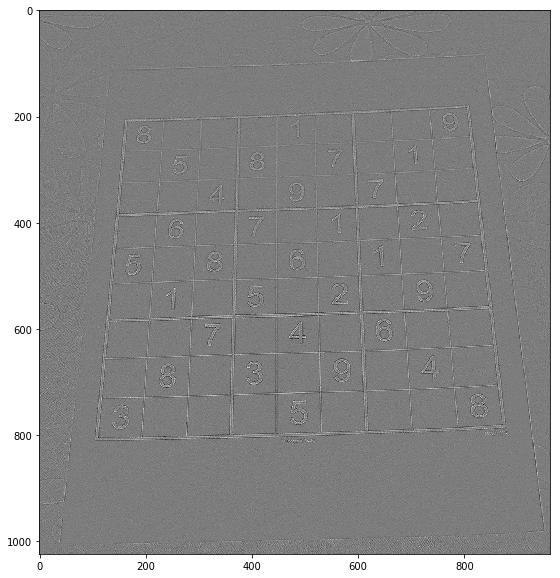

In [66]:
display_img(laplacian)

In [67]:
blended = cv2.addWeighted(src1=sobelx,alpha=0.5,src2=sobely,beta=0.5,gamma=0)

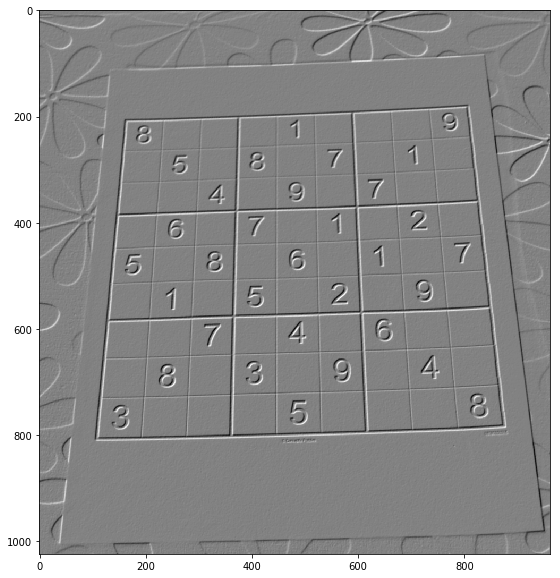

In [68]:
display_img(blended)

In [69]:
ret,th1 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)

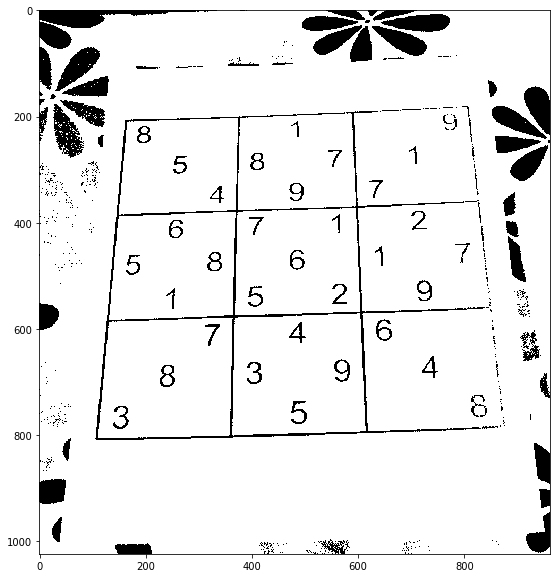

In [70]:
display_img(th1)

In [71]:
kernel = np.ones((4,4),np.uint8)

In [72]:
gradient = cv2.morphologyEx(blended,cv2.MORPH_GRADIENT,kernel)

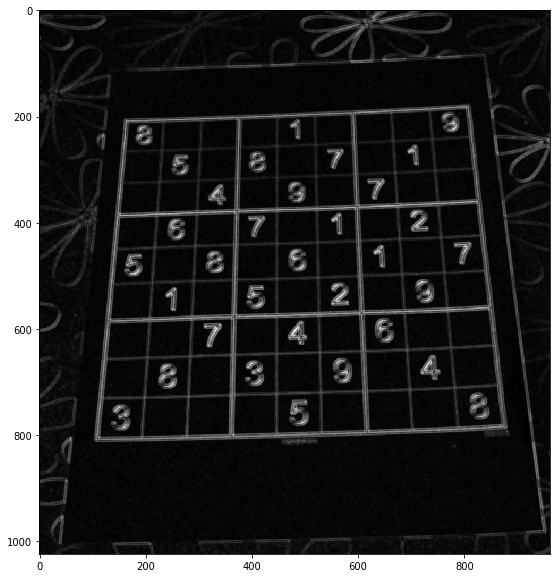

In [73]:
display_img(gradient)

In [74]:
dark_horse = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/horse.jpg')
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/rainbow.jpg')
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)


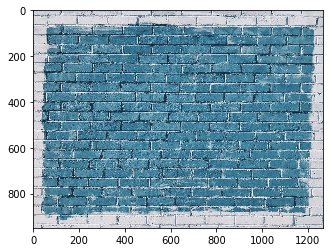

In [77]:
plt.imshow(show_bricks)

In [78]:
hist_values = cv2.calcHist([blue_bricks],channels=[0],mask=None,histSize=[256],ranges=[0,256])

In [79]:
hist_values.shape

(256, 1)

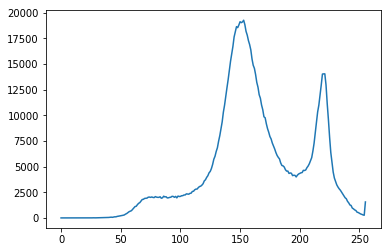

In [81]:
plt.plot(hist_values)

In [82]:
hist_values = cv2.calcHist([dark_horse],channels=[0],mask=None,histSize=[256],ranges=[0,256])

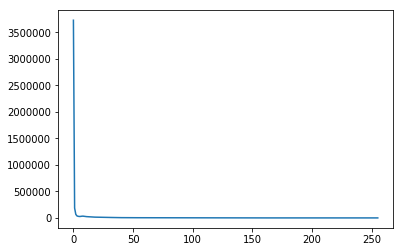

In [83]:
plt.plot(hist_values)

In [87]:
img = blue_bricks
img1 = dark_horse

Text(0.5,1,'HISTOGRAM FOR BLUEBRRICKS')

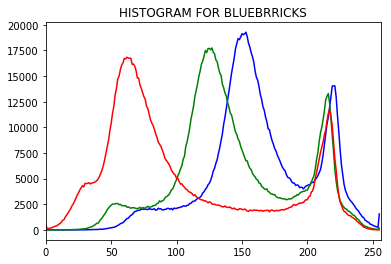

In [86]:
color = ('b','g','r')

for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])
    
plt.title('HISTOGRAM FOR BLUEBRRICKS')

Text(0.5,1,'HISTOGRAM FOR DARKHORSE')

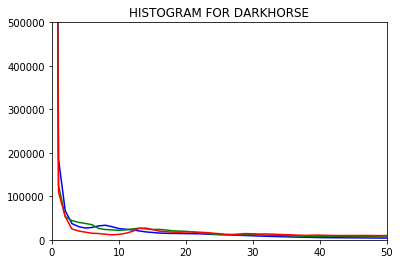

In [91]:
color = ('b','g','r')

for i,col in enumerate(color):
    histr = cv2.calcHist([img1],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,50])
    plt.ylim([0,500000])
plt.title('HISTOGRAM FOR DARKHORSE')

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
rainbow = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/rainbow.jpg')
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

In [7]:
img = rainbow

In [8]:
img.shape

(550, 413, 3)

In [9]:
mask = np.zeros(img.shape[:2],np.uint8)

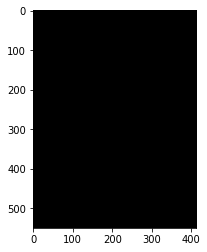

In [10]:
plt.imshow(mask,cmap='gray')

In [11]:
mask[300:400,100:400] = 255

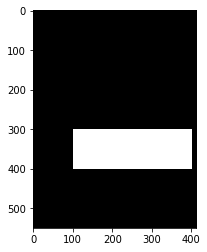

In [12]:
plt.imshow(mask,cmap='gray')

In [13]:
masked_img = cv2.bitwise_and(img,img,mask=mask)

show_masked_img = cv2.bitwise_and(show_rainbow,show_rainbow,mask=mask)

In [14]:
show_masked_img = cv2.bitwise_and(show_rainbow,show_rainbow,mask=mask)

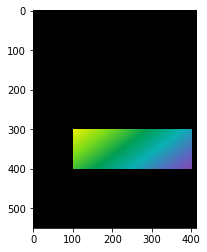

In [15]:
plt.imshow(show_masked_img)

In [16]:
hist_mask_values_red = cv2.calcHist([rainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])

In [18]:
hist_values_red = cv2.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])

Text(0.5,1,'RED')

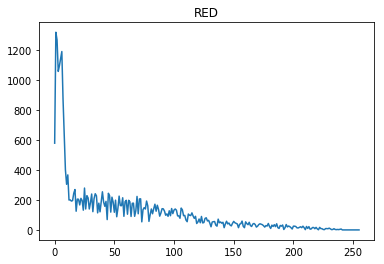

In [19]:
plt.plot(hist_mask_values_red)
plt.title('RED')

Text(0.5,1,'RED normal')

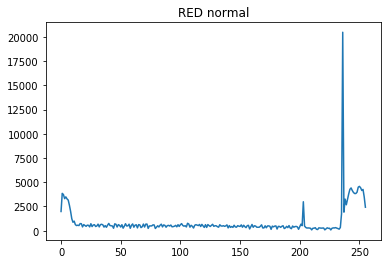

In [20]:
plt.plot(hist_values_red)
plt.title('RED normal')

In [21]:
gorilla = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/gorilla.jpg',0)

In [24]:
def display_img(img,cmap=None):
     fig = plt.figure(figsize=(10,8))
     ax = fig.add_subplot(111)
     ax.imshow(img,cmap)

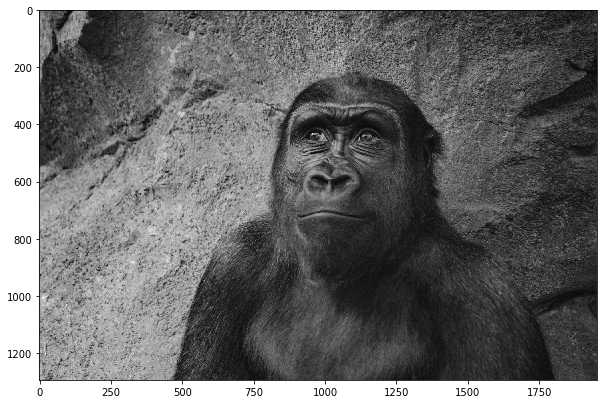

In [25]:
display_img(gorilla,cmap='gray')

In [26]:
hist_values = cv2.calcHist([gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])

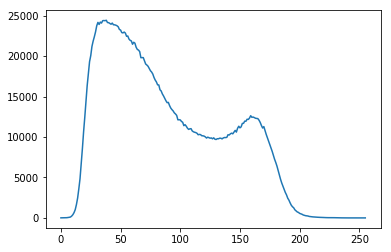

In [27]:
plt.plot(hist_values)

In [28]:
eq_gorilla = cv2.equalizeHist(gorilla)

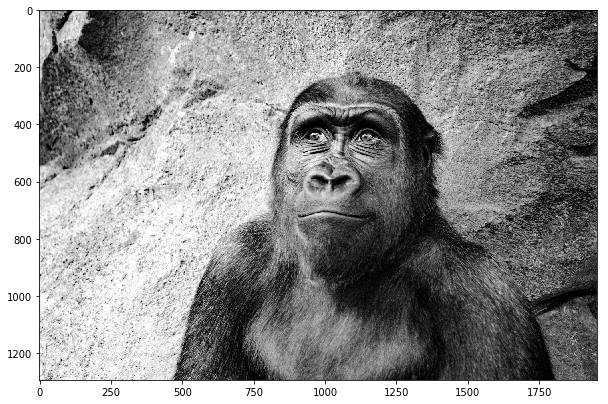

In [30]:
display_img(eq_gorilla,cmap='gray')

In [31]:
hist_values = cv2.calcHist([eq_gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])

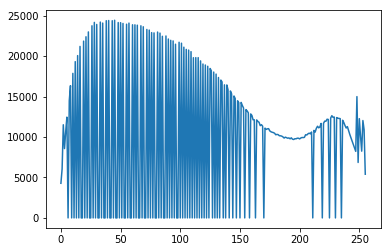

In [32]:
plt.plot(hist_values)

In [33]:
color_gorilla= cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/gorilla.jpg')

In [34]:
show_gorilla = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2RGB)

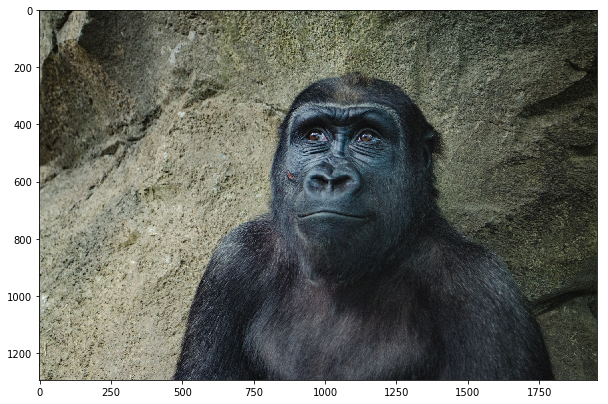

In [35]:
display_img(show_gorilla)

In [36]:
hsv= cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2HSV)

In [38]:
hsv[:,:,2].min()

0

In [39]:
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

In [40]:
eq_color_gorilla = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)

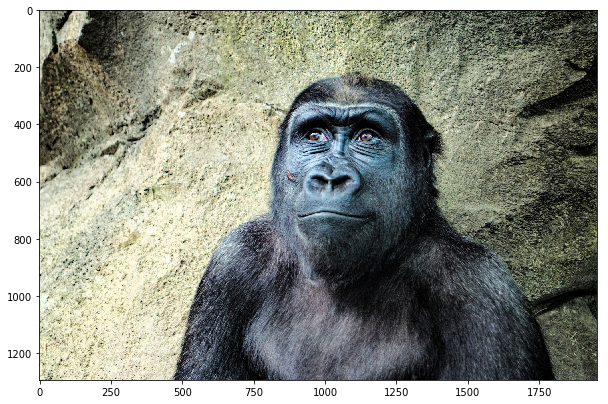

In [41]:
display_img(eq_color_gorilla)